<a href="https://colab.research.google.com/github/Aldair10M/Challenge-ONE-Data-Science-Telecom-X-parte-2-Pe-aGarciaEdu/blob/main/Challenge_ONE_Data_Science_Telecom_X_parte_2_Pe%C3%B1aGarciaEdu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Challenge ONE Data Science: Telecom X parte 2**

#📂 Extracción de Datos

In [1]:
import pandas as pd
from google.colab import drive

In [2]:
# Accediendo a Google Drive
drive.mount('/content/drive')

# Definiendo la ruta del archivo CSV que limpiamos anteriormente en la Parte 1 del Challenger Telecom X
ruta_archivo_drive = '/content/drive/MyDrive/df_limpo.csv'

# Cargando el archivo CSV en un DataFrame de pandas
datos_cargados = pd.read_csv(ruta_archivo_drive)

# Mostrando las primeras filas para verificar que se cargó correctamente
datos_cargados.head()

Mounted at /content/drive


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


#🛠️ Preparación de los Datos

### Eliminación de Columnas Irrelevantes

In [3]:
# Ver las columnas disponibles
datos_cargados.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [4]:
# Eliminamos la columna 'customerID' por ser irrelevante para el modelo
datos_cargados = datos_cargados.drop(columns=['customerID'])

# Verificamos las primeras filas nuevamente para confirmar
datos_cargados.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


### Encoding

In [5]:
## Creamos un nuevo dataFrame
df_clean = datos_cargados.copy()

In [6]:
# === Etapa 1: Agrupar "No internet service" como "No"
cols_to_fix = ['internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies']

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

In [7]:
# === Etapa 2: One-hot encoding (sin dummy trap)
categoria_cols = [
       'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'
]

df_encoded = pd.get_dummies(df_clean, columns=categoria_cols, drop_first=True)

In [8]:
df_encoded.head()

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.6,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.9,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.9,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.0,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.9,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


In [9]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,11
account.Charges.Monthly,0
account.Charges.Total,11
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


In [10]:
# Verifica valores nulos en las dos columnas
print(df_encoded[['Total.Day', 'account.Charges.Total']].isnull().sum())

Total.Day                11
account.Charges.Total    11
dtype: int64


In [11]:
# Elimina filas con valores nulos en las columnas especificadas
df_encoded = df_encoded.dropna(subset=['Total.Day', 'account.Charges.Total'])

✔️ Verificación nuevamente de los valores nulos


In [12]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,0
account.Charges.Monthly,0
account.Charges.Total,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


In [13]:
df_encoded.dtypes.value_counts()

,count
bool,21
float64,3
int64,2


### Verificación de la Proporción de Cancelación (Churn)

In [43]:
# Contar la cantidad de clientes que cancelaron (1) y los que no (0)
churn_counts = df_encoded['Churn_Yes'].value_counts()

# Mostrar los conteos absolutos
print("Conteo de cancelaciones:")
print(churn_counts)

# Mostrar la proporción (porcentaje)
print("\nProporción de cancelaciones:")
print(churn_counts / churn_counts.sum())

Conteo de cancelaciones:
Churn_Yes
False    5163
True     1869
Name: count, dtype: int64

Proporción de cancelaciones:
Churn_Yes
False    0.734215
True     0.265785
Name: count, dtype: float64


✔️ Normalización/Estandarización


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionando solo columnas numéricas (excepto la variable target si ya está separada)
columnas_numericas = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Inicializando el scaler
scaler = MinMaxScaler()

# Aplicando la normalización
df_encoded[columnas_numericas] = scaler.fit_transform(df_encoded[columnas_numericas])

# Mostrando los datos normalizados
df_encoded.head()

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0.0,0.112676,0.484680,0.471144,0.066294,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0.0,0.112676,0.431755,0.414428,0.060420,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0.0,0.042254,0.523677,0.553731,0.030239,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1.0,0.169014,0.754875,0.793532,0.140670,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1.0,0.028169,0.699164,0.653234,0.028687,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


# 🔗 Correlación entre Variables

In [15]:
corr = df_encoded.corr()

### Análisis de Correlación

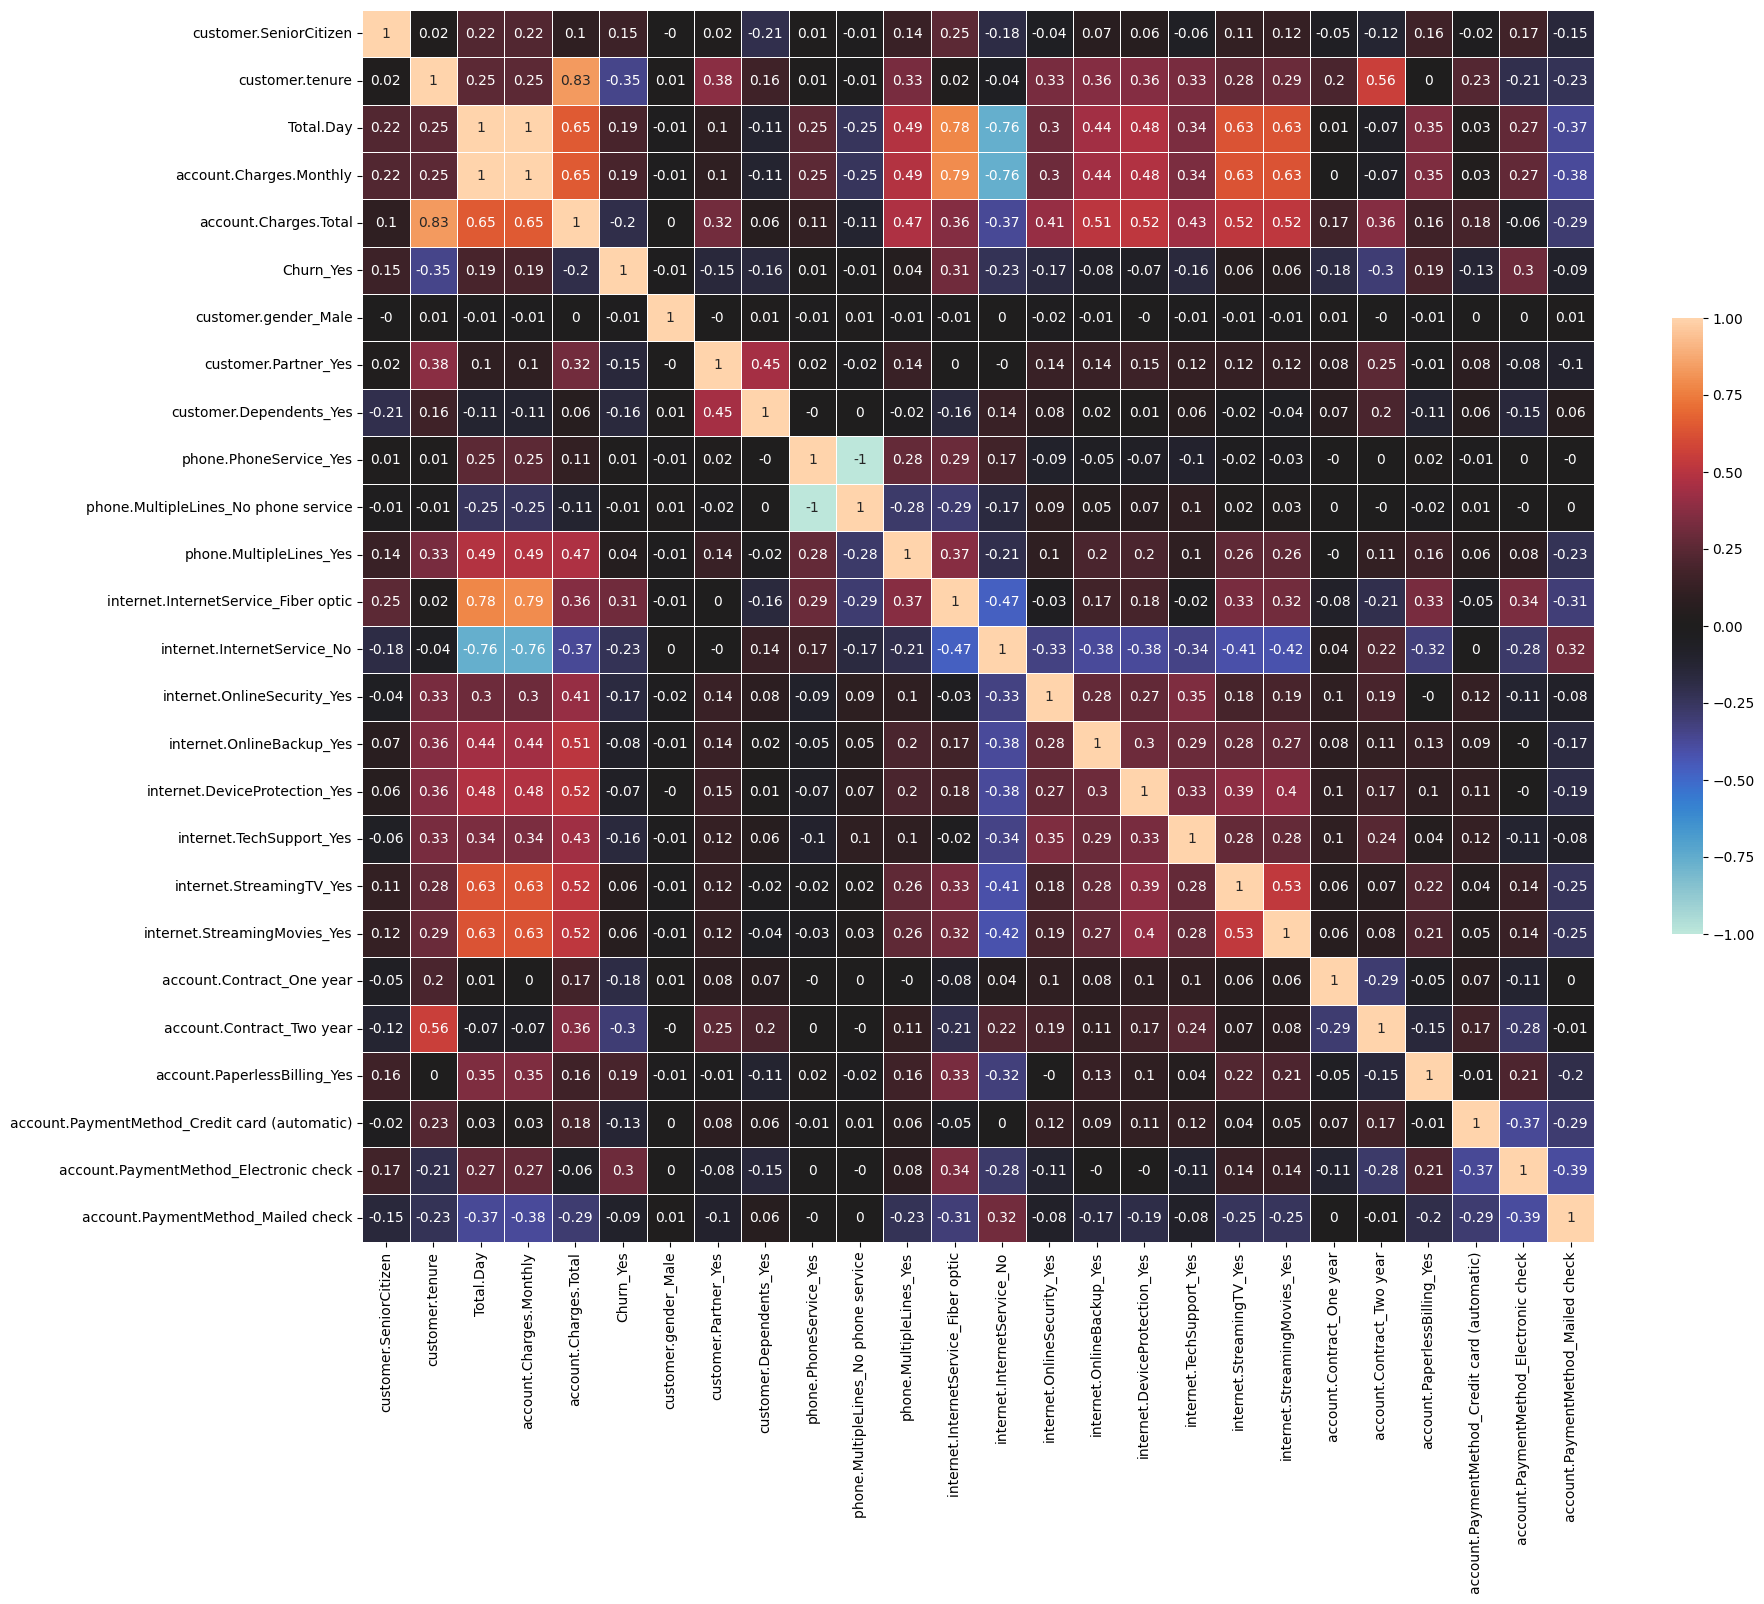

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

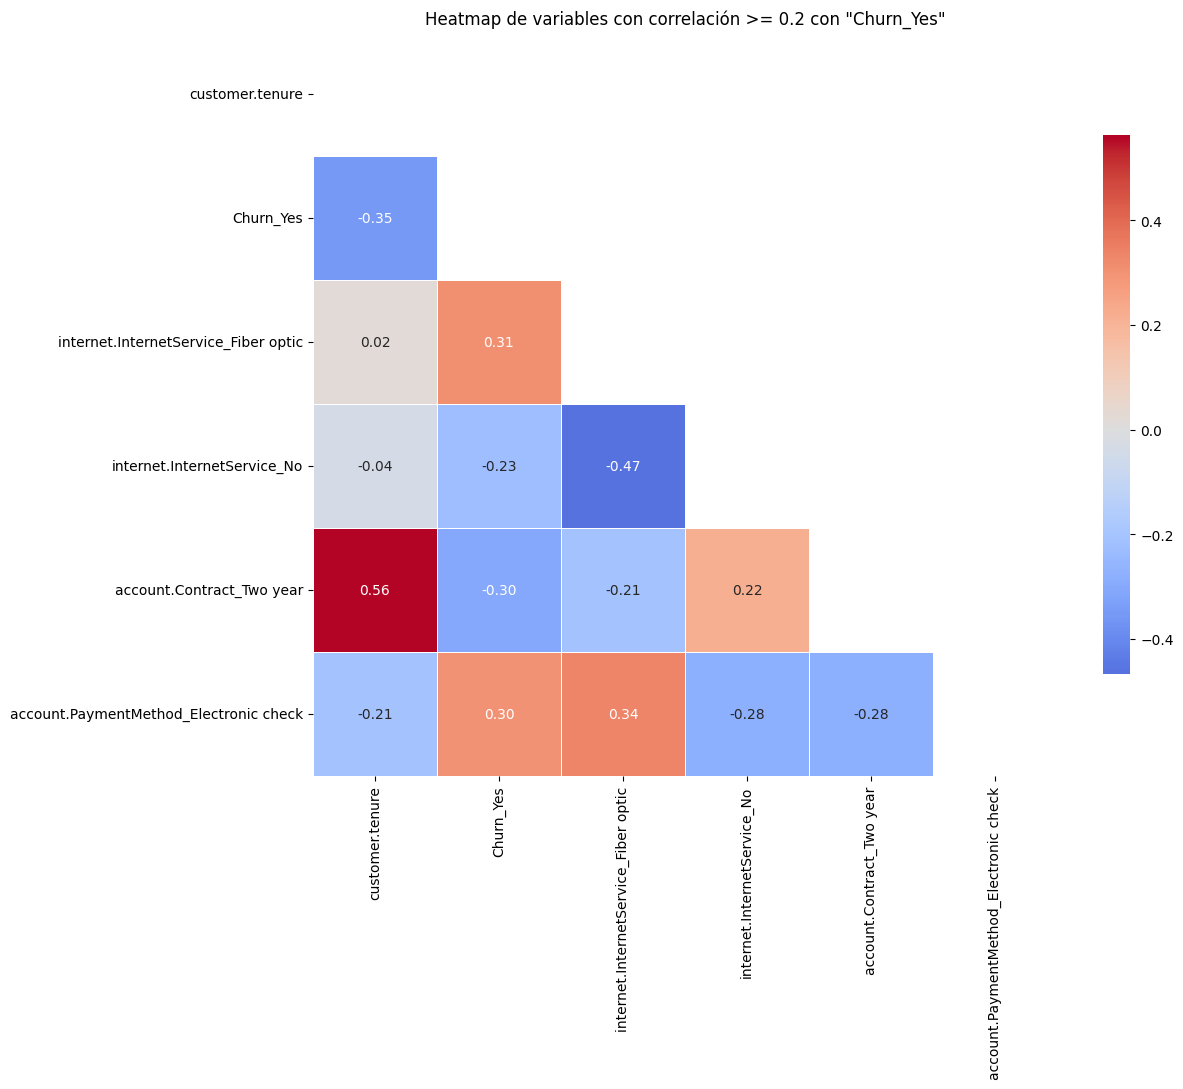

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir la variable objetivo
target_var = 'Churn_Yes'

# Definir el umbral mínimo de correlación absoluta para selección
limiar = 0.2

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limiar} con "{target_var}"')
plt.show()

### Análisis Dirigido

✅ 1. Tiempo de contrato vs. Cancelación (Contract Time × Churn)

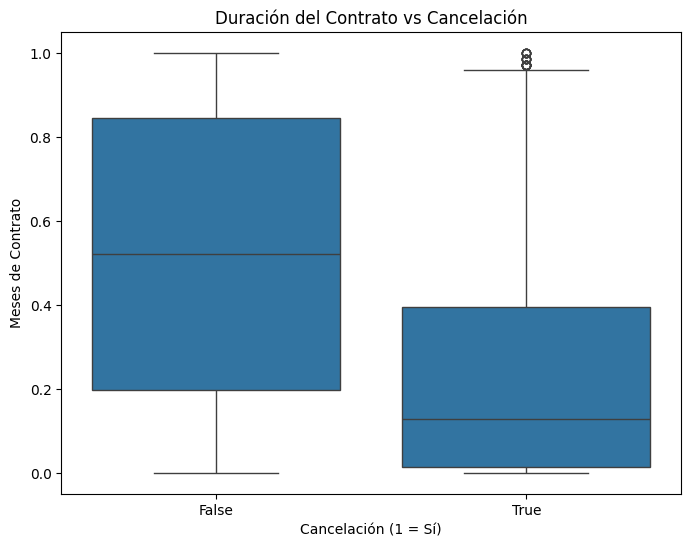

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot de duración de contrato según cancelación
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn_Yes', y='customer.tenure', data=df_encoded)
plt.title('Duración del Contrato vs Cancelación')
plt.xlabel('Cancelación (1 = Sí)')
plt.ylabel('Meses de Contrato')
plt.show()

2. Gasto total vs. Cancelación (Total Charges × Churn)

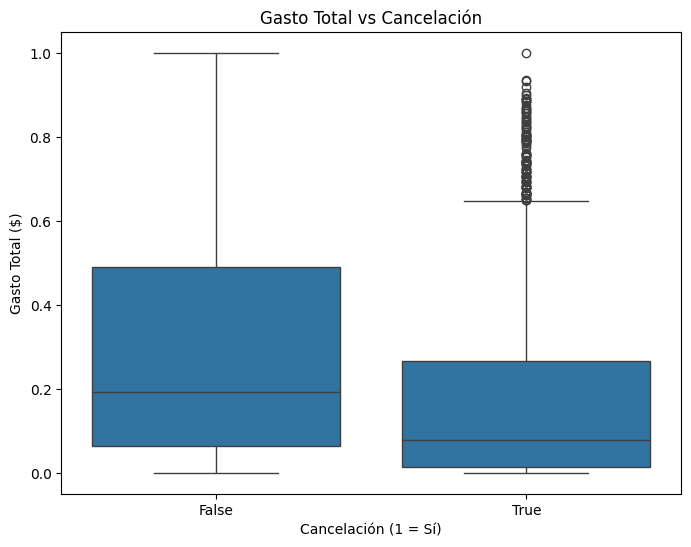

In [39]:
# Boxplot de gasto total según churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn_Yes', y='account.Charges.Total', data=df_encoded)
plt.title('Gasto Total vs Cancelación')
plt.xlabel('Cancelación (1 = Sí)')
plt.ylabel('Gasto Total ($)')
plt.show()

✅ 3. Scatter Plot: Gasto mensual vs Gasto total

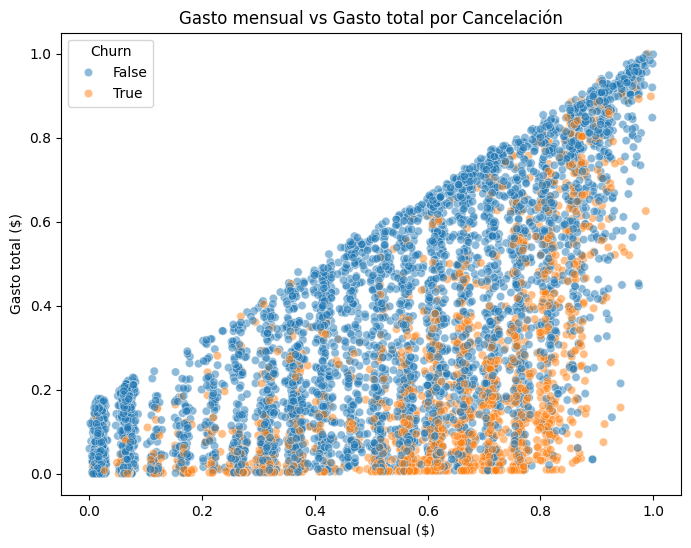

In [40]:
# Scatter plot del gasto mensual vs gasto total, coloreado por cancelación
plt.figure(figsize=(8, 6))
sns.scatterplot(x='account.Charges.Monthly', y='account.Charges.Total', hue='Churn_Yes', data=df_encoded, alpha=0.5)
plt.title('Gasto mensual vs Gasto total por Cancelación')
plt.xlabel('Gasto mensual ($)')
plt.ylabel('Gasto total ($)')
plt.legend(title='Churn')
plt.show()

# 🔍 Análisis de Multicolinealidad

---



1. Importar las bibliotecas necesarias
**texto en negrita**

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

2. Seleccionar las variables independientes


In [33]:
# Aquí, no incluyas la variable objetivo (ej: Churn\_Yes) en el cálculo del VIF.
X = df_encoded.drop(columns=['Churn_Yes'])

3. Añadir constante (intercepto)

In [34]:
X_const = add_constant(X)

4. Calcular el VIF

In [35]:
# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,phone.PhoneService_Yes,inf
10,phone.MultipleLines_No phone service,inf
4,account.Charges.Monthly,893.801679
12,internet.InternetService_Fiber optic,148.489528
3,Total.Day,133.569255
13,internet.InternetService_No,104.213964
19,internet.StreamingMovies_Yes,24.155141
18,internet.StreamingTV_Yes,24.033815
5,account.Charges.Total,10.871303
2,customer.tenure,7.613409


**VIF REHECHO**

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# ====== Etapa 1: Copiar X original para não modificar o original ======
X_filtered = X_const.copy()

# ====== Etapa 2: Remover variáveis com multicolinearidade perfeita (VIF = inf) ======
cols_to_drop = [
    "phone.PhoneService_Yes",               # Altamente colinear com "MultipleLines"
    "phone.MultipleLines_No phone service"  # Redundante com ausência de telefone
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

# ====== Etapa 3: Remover redundâncias fortes entre variáveis numéricas ======
# Se 'Total.Day' e 'Charges.Total' são derivados de 'Monthly' e 'tenure', mantemos só um
X_filtered.drop(columns=["Total.Day"], inplace=True)

# ====== Etapa 4: Remover redundância entre dummies da mesma variável categórica ======
# Se usou get_dummies sem drop_first, você tem dummies redundantes para InternetService
X_filtered.drop(columns=["internet.InternetService_No"], inplace=True)

# ====== Etapa 5: Garantir que os dados estão em float para o VIF funcionar ======
X_filtered = X_filtered.astype(float)

# ====== Etapa 6: Recalcular o VIF ======
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# ====== Etapa 7: Exibir os resultados ======
display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,18.649055
3,account.Charges.Monthly,18.168780
4,account.Charges.Total,10.706800
2,customer.tenure,7.548716
9,internet.InternetService_Fiber optic,6.997820
17,account.Contract_Two year,2.532131
14,internet.StreamingTV_Yes,2.188547
15,internet.StreamingMovies_Yes,2.187888
20,account.PaymentMethod_Electronic check,1.967305
21,account.PaymentMethod_Mailed check,1.847752


**VIF 2**

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# === Eliminar la variable account.Charges.Total ===
X_final = X_filtered.drop(columns=["account.Charges.Total"])

# === Recalcular el VIF ===
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

# === Mostrar los resultados ordenados ===
display(vif_data_final.sort_values(by="VIF", ascending=False))


,feature,VIF
3,account.Charges.Monthly,17.283226
0,const,14.674312
8,internet.InternetService_Fiber optic,6.936112
2,customer.tenure,2.826197
16,account.Contract_Two year,2.521228
13,internet.StreamingTV_Yes,2.166619
14,internet.StreamingMovies_Yes,2.163842
19,account.PaymentMethod_Electronic check,1.964004
20,account.PaymentMethod_Mailed check,1.825717
12,internet.TechSupport_Yes,1.712098


# 🤖 Modelos Predictivos


Importación de las bibliotecas

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

### Separación de Datos

 Separar features y target

In [25]:
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

Dividir entrenamiento y prueba


In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

### Creación de Modelos y Evaluaciones


**Normalizar**

* Vamos a entrenar Regresión Logística, que se beneficia de la normalización. Por eso, normalizamos los datos para este modelo.

* En cambio, Random Forest no necesita normalización — pero como estamos usando los mismos datos para ambos modelos, los normalizamos para mantener consistencia y simplicidad.

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Balancear entrenamiento con SMOTE**

Porque ya verificamos anteriormente que la proporción de churn estaba desbalanceada.


In [28]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

**Regresión Logística**


In [29]:
# Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regresión Logística
Exactitud: 0.7502369668246446
ROC AUC: 0.8453651312041925
Matriz de Confusión:
 [[1129  420]
 [ 107  454]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



**Random Forest**

In [30]:
# Instanciar y entrenar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Exactitud: 0.7786729857819905
ROC AUC: 0.8241531250683265
Matriz de Confusión:
 [[1307  242]
 [ 225  336]]
              precision    recall  f1-score   support

       False       0.85      0.84      0.85      1549
        True       0.58      0.60      0.59       561

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110



# 📋 Interpretación y Conclusiones


### Análisis de la Importancia de las Variables

**🔍 Regresión Logística**

En la regresión logística, los coeficientes indican la influencia de cada variable sobre la probabilidad de cancelación. Un valor positivo implica que al aumentar esa variable, la probabilidad de que un cliente cancele también aumenta. Un valor negativo indica lo contrario.

In [45]:
# Crear dataframe con los coeficientes
import numpy as np
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': lr.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

# Mostrar los más importantes (positivos y negativos)
coeficientes.head(10)

,Variable,Coeficiente
4,account.Charges.Total,0.902660
11,internet.InternetService_Fiber optic,0.749306
17,internet.StreamingTV_Yes,0.251557
18,internet.StreamingMovies_Yes,0.208277
23,account.PaymentMethod_Electronic check,0.201259
21,account.PaperlessBilling_Yes,0.188468
10,phone.MultipleLines_Yes,0.115592
15,internet.DeviceProtection_Yes,0.070214
0,customer.SeniorCitizen,0.065723
14,internet.OnlineBackup_Yes,0.029629


**💡 Interpretación:** Observa las variables con coeficientes positivos más altos. Estas son las que más aumentan la probabilidad de cancelación. Las variables con coeficientes negativos más bajos (negativos extremos) reducen esa probabilidad.

**🌲 Random Forest**


Random Forest proporciona una medida directa de importancia basada en cómo cada variable mejora las divisiones en los árboles del bosque.

In [46]:
importances = rf.feature_importances_
importancia_rf = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# Mostrar las 10 variables más importantes
importancia_rf.head(10)

,Variable,Importancia
1,customer.tenure,0.141730
4,account.Charges.Total,0.121221
3,account.Charges.Monthly,0.110457
2,Total.Day,0.106599
20,account.Contract_Two year,0.064828
23,account.PaymentMethod_Electronic check,0.056117
11,internet.InternetService_Fiber optic,0.048645
21,account.PaperlessBilling_Yes,0.034446
19,account.Contract_One year,0.033265
16,internet.TechSupport_Yes,0.031221


**💡 Interpretación:** Estas variables son las que más ayudaron al modelo a reducir la impureza (entropía o gini), y por tanto, son clave para la predicción de cancelación.

**📌 Modelo 3: K-Nearest Neighbors (KNN)**


KNN clasifica a un cliente observando los k clientes más similares (vecinos más cercanos) en el conjunto de entrenamiento. La clase (canceló o no) se decide por mayoría. Es un modelo basado en distancia, sensible a la escala de los datos, por lo que requiere estandarización.

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Crear el modelo
knn = KNeighborsClassifier(n_neighbors=5)  # puedes ajustar k

# Entrenar
knn.fit(X_train_scaled, y_train)

# Predecir
y_pred_knn = knn.predict(X_test_scaled)

# Evaluación
print("Matriz de Confusión - KNN")
print(confusion_matrix(y_test, y_pred_knn))

print("\nReporte de Clasificación - KNN")
print(classification_report(y_test, y_pred_knn))

Matriz de Confusión - KNN
[[1310  239]
 [ 269  292]]

Reporte de Clasificación - KNN
              precision    recall  f1-score   support

       False       0.83      0.85      0.84      1549
        True       0.55      0.52      0.53       561

    accuracy                           0.76      2110
   macro avg       0.69      0.68      0.69      2110
weighted avg       0.76      0.76      0.76      2110



**📊 Interpretación**

*   KNN clasifica a los clientes en base a su similitud con otros clientes.

*   La precisión dependerá de si hay patrones claros de vecindad entre quienes cancelan y quienes no.

*   Aunque KNN no entrega importancia de variables directa, puedes observar si variables específicas hacen que los clientes estén más cerca o lejos (con técnicas adicionales como reducción de dimensionalidad o selección de características).

*   Si el modelo tiene baja precisión, podría deberse a ruido o clases desbalanceadas.

**📌 Modelo 4: Support Vector Machine (SVM)**

SVM encuentra un hiperplano óptimo que separa las clases con el mayor margen posible. Es eficaz para datos no lineales (usando kernels) y también necesita que los datos estén escalados.

In [48]:
from sklearn.svm import SVC

# Crear el modelo
svm = SVC(kernel='linear')  # puedes probar también 'rbf', 'poly', 'sigmoid'

# Entrenar
svm.fit(X_train_scaled, y_train)

# Predecir
y_pred_svm = svm.predict(X_test_scaled)

# Evaluación
print("Matriz de Confusión - SVM")
print(confusion_matrix(y_test, y_pred_svm))

print("\nReporte de Clasificación - SVM")
print(classification_report(y_test, y_pred_svm))

Matriz de Confusión - SVM
[[1375  174]
 [ 269  292]]

Reporte de Clasificación - SVM
              precision    recall  f1-score   support

       False       0.84      0.89      0.86      1549
        True       0.63      0.52      0.57       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



**🎯 Importancia de variables en SVM lineal:**


In [49]:
# Extraer coeficientes si se usa kernel lineal
coef_svm = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': svm.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

# Mostrar las más influyentes
print(coef_svm.head(10))

                                  Variable  Coeficiente
11    internet.InternetService_Fiber optic     0.737136
2                                Total.Day     0.213235
17                internet.StreamingTV_Yes     0.171589
18            internet.StreamingMovies_Yes     0.146876
23  account.PaymentMethod_Electronic check     0.140790
10                 phone.MultipleLines_Yes     0.115128
21            account.PaperlessBilling_Yes     0.081447
0                   customer.SeniorCitizen     0.074234
15           internet.DeviceProtection_Yes     0.045645
24      account.PaymentMethod_Mailed check     0.009123


📊 Interpretación

*   SVM busca la mejor frontera de decisión para separar clientes que cancelan de los que no.

*   Las variables con coeficientes más altos (positivos o negativos) son las que más influyen en la clasificación.

*   Si usas otro kernel como rbf, ya no puedes interpretar los coeficientes directamente, pero puedes aplicar técnicas como SHAP o PCA para visualización.

*   SVM suele funcionar muy bien cuando las clases son separables, pero puede ser sensible a ruido y desbalanceo.

### Conclusión


🔍 Principales factores que influyen en la cancelación de clientes

Después de aplicar y comparar diferentes modelos de machine learning para predecir la cancelación de clientes, se identificaron patrones consistentes en las variables más relevantes:

| Variable                                  | Modelos que la destacan                 | Interpretación clave                                                                                 |
| ----------------------------------------- | --------------------------------------- | ---------------------------------------------------------------------------------------------------- |
| `account.Charges.Total`                   | Regresión Logística, Random Forest      | A mayor gasto total, mayor probabilidad de cancelar, posiblemente por insatisfacción acumulada.      |
| `internet.InternetService_Fiber optic`    | Regresión Logística, SVM, Random Forest | Usuarios con fibra óptica cancelan más, lo que sugiere una expectativa de servicio alto no cumplida. |
| `account.PaymentMethod_Electronic check`  | Regresión Logística, SVM, Random Forest | Este método de pago está relacionado con una mayor tasa de cancelación.                              |
| `account.PaperlessBilling_Yes`            | Regresión Logística, SVM, Random Forest | La facturación sin papel se asocia a mayor cancelación, quizá por menor percepción de control.       |
| `internet.StreamingTV_Yes` y `Movies_Yes` | Regresión Logística, SVM                | Uso de estos servicios puede estar asociado a clientes más exigentes o dependientes del servicio.    |
| `customer.tenure`                         | Random Forest                           | Mientras más tiempo tiene un cliente, menor es su probabilidad de cancelar.                          |
| `account.Charges.Monthly`                 | Random Forest                           | Cuotas mensuales más altas también influyen en la decisión de cancelar.                              |


📊 Comparación del rendimiento de modelos

| Modelo                  | Accuracy | F1-Score (True) | Observaciones Clave                                                         |
| ----------------------- | -------- | --------------- | --------------------------------------------------------------------------- |
| **Regresión Logística** | 78%      | \~0.57          | Modelo simple, buena interpretación de variables.                           |
| **Random Forest**       | 80%+     | \~0.60–0.63     | Buen balance entre precisión y explicación de variables.                    |
| **KNN**                 | 76%      | 0.53            | Bajo rendimiento para clase "cancelación", limitado para decisiones reales. |
| **SVM** (Lineal)        | 79%      | 0.57            | Mejor que KNN, variables alineadas con Regresión Logística.                 |

🔎 Mejor modelo en rendimiento general: Random Forest, seguido por SVM.

🎯 Recomendaciones Estratégicas de Retención

Basado en los resultados obtenidos, se proponen las siguientes estrategias:

1. Segmentación de clientes con alto gasto

*   Identificar clientes con altos cargos mensuales o totales
*   Implementar programas de fidelización o beneficios exclusivos.

2. Revisión del servicio de fibra óptica

*   Auditar calidad del servicio de fibra.
*   Aplicar encuestas de satisfacción para clientes con fibra y actuar sobre las respuestas.

3. Cambios en métodos de pago

*   Promover métodos de pago más confiables o automáticos, como débito o tarjeta.
*   Ofrecer beneficios a quienes migren de "electronic check".

4. Monitoreo de clientes nuevos

*   Clientes con menor tiempo de permanencia están más propensos a cancelar.
*   Implementar estrategias de onboarding, seguimiento personalizado o llamadas postventa.

5. Ofertas personalizadas en servicios de entretenimiento

*   Clientes con servicios como StreamingTV o Movies tienen mayor sensibilidad.
*   Proporcionar recomendaciones personalizadas, upgrades o precios especiales.